Implementación de Algoritmo de Aprendizaje En Secuencia:  
-  Implemente el algoritmo de aprendizaje secuencial del perceptrón y corra el mismo 
por 100 épocas. Inicializando los pesos de forma aleatoria para los tres datasets. 
En todos los casos enfóquese en medir el accuracy (es decir, el número de aciertos 
de clasificación versus el número total de eventos).  
-  Para los tres datasets recopile el accuracy por época y genere gráficos (eje equis 
el número de época y en el eje ye el valor de accuracy para esa época).  
-  Para todos los datasets dibuje el decision boundary (es decir, el hiperplano que 
divide los datos entre categoría +1 y -1. 

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Perceptron Linear

In [2]:
# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


# Plot the decision boundary
def plot_decision_boundary(perceptron, training_inputs, labels):
    if perceptron.weights is None:
        print("Perceptron has not been trained.")
        return

    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.Spectral)

    # Plot the decision boundary
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.round(np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()


# Data Set 1 - Linearly Separable

In [3]:
x = pd.read_csv('./XY/x.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,2.822737,4.154048
1,0.741074,0.032447
2,4.794975,0.404499
3,1.672767,3.685057
4,3.571626,1.126299
...,...,...
195,3.035141,4.776586
196,4.343927,1.170200
197,3.656601,2.025832
198,4.031428,3.240811


In [4]:
y = pd.read_csv('./XY/y.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


### Plot X

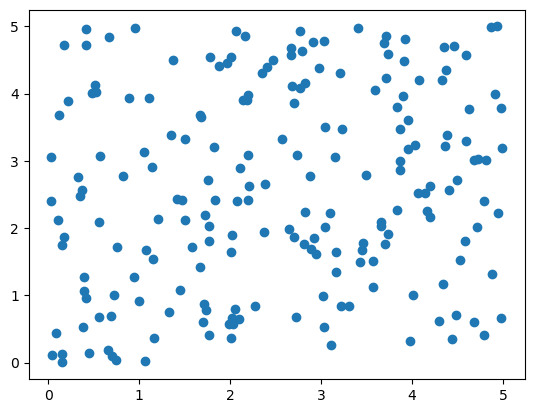

In [5]:
plt.scatter(x['X'], x['Y'])

### Perceptron Secuencial Data Set 1

In [6]:
# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = Perceptron(epochs=100, learning_rate=0.01, weights=np.random.rand(3))
# data set to numpy array
training_inputs = x.to_numpy()
labels = y.to_numpy()
# train the perceptron
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 75.0
Epoch: 1 Accuracy: 78.0
Epoch: 2 Accuracy: 99.25
Epoch: 3 Accuracy: 102.25
Epoch: 4 Accuracy: 102.25
Epoch: 5 Accuracy: 102.25
Epoch: 6 Accuracy: 102.0
Epoch: 7 Accuracy: 102.0
Epoch: 8 Accuracy: 102.0
Epoch: 9 Accuracy: 102.25
Epoch: 10 Accuracy: 102.25
Epoch: 11 Accuracy: 102.25
Epoch: 12 Accuracy: 102.25
Epoch: 13 Accuracy: 102.75
Epoch: 14 Accuracy: 102.75
Epoch: 15 Accuracy: 102.75
Epoch: 16 Accuracy: 102.75
Epoch: 17 Accuracy: 103.0
Epoch: 18 Accuracy: 103.25
Epoch: 19 Accuracy: 103.25
Epoch: 20 Accuracy: 103.25
Epoch: 21 Accuracy: 103.25
Epoch: 22 Accuracy: 103.25
Epoch: 23 Accuracy: 103.25
Epoch: 24 Accuracy: 103.25
Epoch: 25 Accuracy: 103.5
Epoch: 26 Accuracy: 103.5
Epoch: 27 Accuracy: 103.5
Epoch: 28 Accuracy: 103.5
Epoch: 29 Accuracy: 103.5
Epoch: 30 Accuracy: 103.5
Epoch: 31 Accuracy: 103.5
Epoch: 32 Accuracy: 103.75
Epoch: 33 Accuracy: 103.75
Epoch: 34 Accuracy: 103.75
Epoch: 35 Accuracy: 104.0
Epoch: 36 Accuracy: 104.25
Epoch: 37 Accuracy: 104.25
E

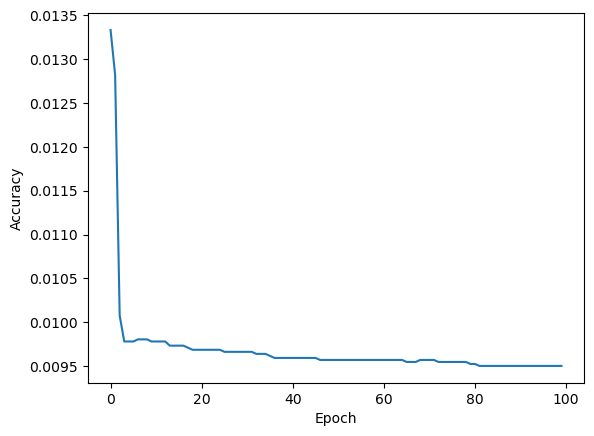

In [7]:
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

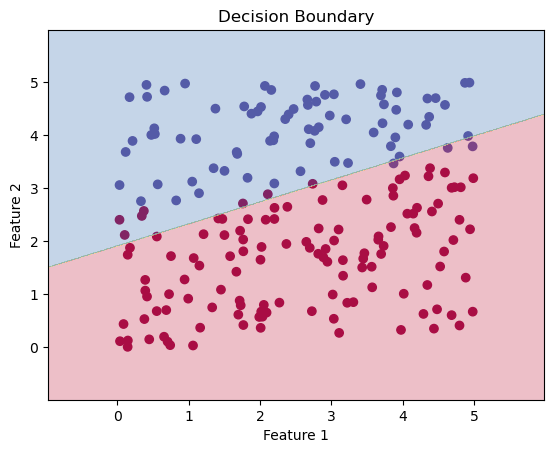

In [8]:
plot_decision_boundary(perceptron, training_inputs, labels)

# Perceptron XOR

In [9]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, weights=None):
        self.weights = weights
        self.bias = np.random.rand()
        self.accuracies = []

    def activate(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activate(weighted_sum)
        return output

    def train(self, training_inputs, labels, epochs, learning_rate):
        for epoch in range(epochs):
            correct_predictions = 0  # Init counter for correct predictions
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

                # Increment correct predictions counter if the prediction is correct
                if prediction == label:
                    correct_predictions += 1

            # Calculate accuracy for the current epoch
            accuracy = correct_predictions / len(labels)
            self.accuracies.append(1/accuracy)
            print(f'Época {epoch + 1}/{epochs}, Precisión: {accuracy}')


def plot_points(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()


## Data Set 3 - XOR

In [10]:
x = pd.read_csv('./XOR/XXOR.csv', header=None)
x.columns = ['X', 'Y']

x


,X,Y
0,0.141117,0.078580
1,-0.005747,-0.039122
2,0.094092,0.040520
3,0.049805,-0.002619
4,-0.168823,-0.011247
...,...,...
95,0.935282,1.047225
96,1.093041,0.982468
97,0.857808,1.199796
98,0.914345,0.845841


In [11]:
y = pd.read_csv('./XOR/YXOR.csv', header=None)
y.columns = ['Class']

y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


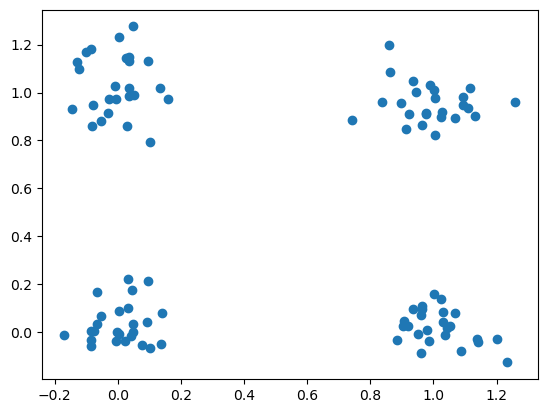

In [12]:
plt.scatter(x['X'], x['Y'])

In [13]:
# Transform to numpy array
training_inputs = np.array(x)
labels = np.array(y)

# Creamos un perceptrón con 2 entradas
perceptron = Perceptron(input_size=2, weights=np.random.rand(2))

# Entrenamos el perceptrón con los datos de entrenamiento
perceptron.train(training_inputs, labels, epochs=100, learning_rate=0.001)

Época 1/100, Precisión: 0.5
Época 2/100, Precisión: 0.5
Época 3/100, Precisión: 0.5
Época 4/100, Precisión: 0.5
Época 5/100, Precisión: 0.5
Época 6/100, Precisión: 0.5
Época 7/100, Precisión: 0.5
Época 8/100, Precisión: 0.5
Época 9/100, Precisión: 0.5
Época 10/100, Precisión: 0.5
Época 11/100, Precisión: 0.56
Época 12/100, Precisión: 0.56
Época 13/100, Precisión: 0.57
Época 14/100, Precisión: 0.6
Época 15/100, Precisión: 0.62
Época 16/100, Precisión: 0.63
Época 17/100, Precisión: 0.64
Época 18/100, Precisión: 0.61
Época 19/100, Precisión: 0.57
Época 20/100, Precisión: 0.6
Época 21/100, Precisión: 0.71
Época 22/100, Precisión: 0.82
Época 23/100, Precisión: 0.88
Época 24/100, Precisión: 0.91
Época 25/100, Precisión: 0.93
Época 26/100, Precisión: 0.94
Época 27/100, Precisión: 0.95
Época 28/100, Precisión: 0.93
Época 29/100, Precisión: 0.95
Época 30/100, Precisión: 0.93
Época 31/100, Precisión: 0.95
Época 32/100, Precisión: 0.93
Época 33/100, Precisión: 0.95
Época 34/100, Precisión: 0.93
É

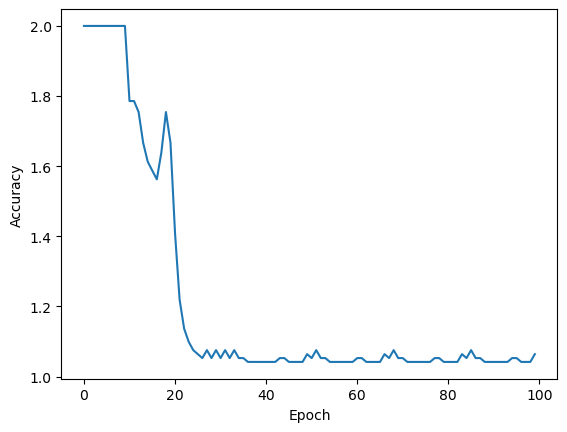

In [14]:
# Plot the accuracies
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


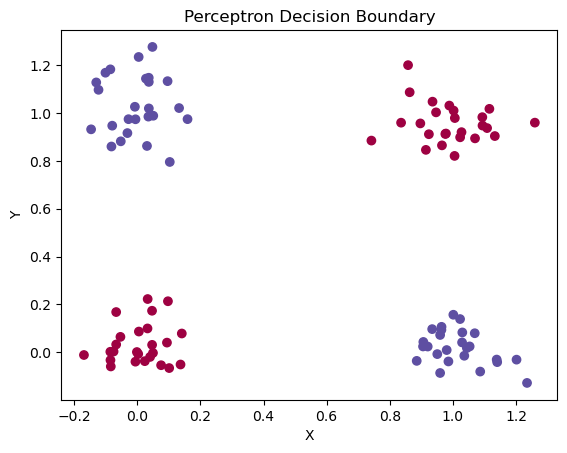

In [15]:
plot_points(training_inputs, labels)

# Perceptron Non Linear

In [16]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self,learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))

def plot_decision_boundary(perceptron, x, y, poly):
    # Definir la malla de puntos
    x_min, x_max = x['X'].min(), x['X'].max()
    y_min, y_max = x['Y'].min(), x['Y'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Preparar datos de la malla y transformarlos a polinomial
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_data)

    # Calcular las predicciones en la malla
    Z = perceptron.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)

    # Graficar los puntos de datos
    scatter = plt.scatter(x['X'], x['Y'], c=y['Class'], s=20, edgecolor='k', cmap=plt.cm.Spectral)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()


# Data set 2 - Non-linearly separable data set

In [17]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.064775,0.074421
1,0.325578,0.497319
2,0.081736,1.159518
3,0.053192,-0.022444
4,0.504479,0.387099
...,...,...
395,-0.308411,-2.315298
396,-2.690173,1.099032
397,-1.195448,2.093523
398,2.614705,1.642373


In [18]:
y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
395,-1
396,-1
397,-1
398,-1


### Plot X NOT LINEARLY SEPARABLE

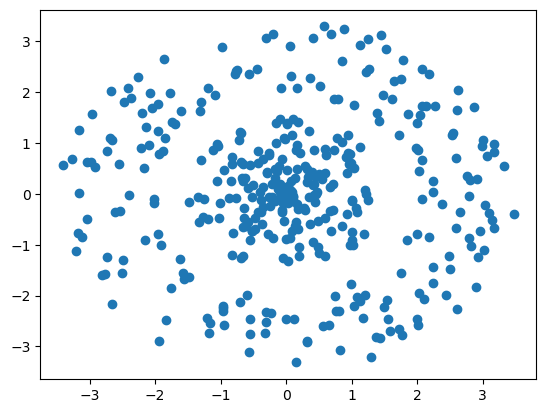

In [19]:
plt.scatter(x['X'], x['Y'])

### Perceptron Secuencial Data Set 2

In [20]:
# Transform the training inputs into a polynomial feature set
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values
# Initialize the perceptron with the new input size
perceptron = Perceptron(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 48.0
Epoch: 1 Accuracy: 53.0
Epoch: 2 Accuracy: 59.5
Epoch: 3 Accuracy: 68.0
Epoch: 4 Accuracy: 74.0
Epoch: 5 Accuracy: 75.0
Epoch: 6 Accuracy: 79.0
Epoch: 7 Accuracy: 81.0
Epoch: 8 Accuracy: 83.0
Epoch: 9 Accuracy: 83.5
Epoch: 10 Accuracy: 84.5
Epoch: 11 Accuracy: 84.5
Epoch: 12 Accuracy: 86.0
Epoch: 13 Accuracy: 87.5
Epoch: 14 Accuracy: 87.5
Epoch: 15 Accuracy: 88.5
Epoch: 16 Accuracy: 89.5
Epoch: 17 Accuracy: 90.0
Epoch: 18 Accuracy: 91.5
Epoch: 19 Accuracy: 92.5
Epoch: 20 Accuracy: 92.5
Epoch: 21 Accuracy: 94.0
Epoch: 22 Accuracy: 94.0
Epoch: 23 Accuracy: 94.5
Epoch: 24 Accuracy: 95.0
Epoch: 25 Accuracy: 95.5
Epoch: 26 Accuracy: 95.5
Epoch: 27 Accuracy: 96.0
Epoch: 28 Accuracy: 96.0
Epoch: 29 Accuracy: 96.0
Epoch: 30 Accuracy: 97.0
Epoch: 31 Accuracy: 97.0
Epoch: 32 Accuracy: 97.0
Epoch: 33 Accuracy: 97.0
Epoch: 34 Accuracy: 97.5
Epoch: 35 Accuracy: 98.0
Epoch: 36 Accuracy: 98.0
Epoch: 37 Accuracy: 98.0
Epoch: 38 Accuracy: 99.0
Epoch: 39 Accuracy: 99.0
Epoch: 40 

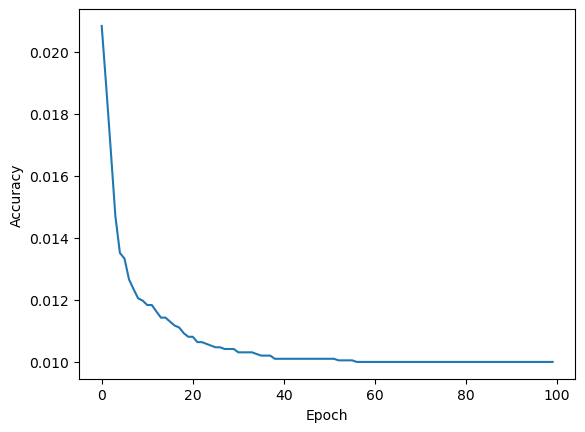

In [21]:
# Graficar el rendimiento (accuracy) a lo largo de las épocas
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

/Users/juancisneros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


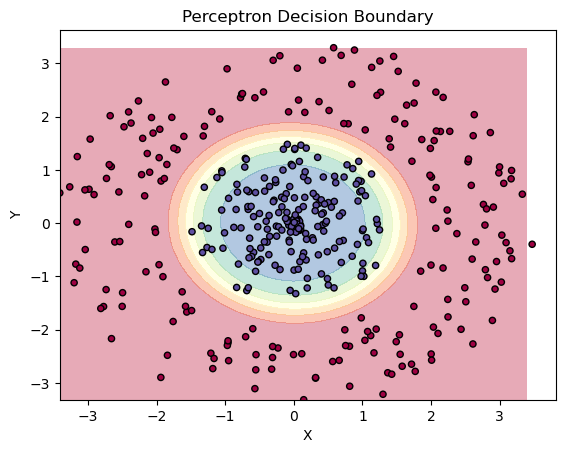

In [22]:
plot_decision_boundary(perceptron, x, y, poly)